In [1]:
# for general dataframe editing
import pandas as pd
import numpy as np

# for plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for pca and pcr
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,r2_score
from numpy.linalg import eig

In [2]:
unique_data = pd.read_csv('Desktop/STA 5703 - Project 1/unique_m.csv')
train_data = pd.read_csv('Desktop/STA 5703 - Project 1/train.csv')
unique_data=unique_data.drop(['critical_temp','material'],axis=1)
df = pd.concat([unique_data,train_data],axis=1)
original_columns = len(df.columns)
original_columns
print(df.shape)
df.head()
train_data.head()

(21263, 168)


,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


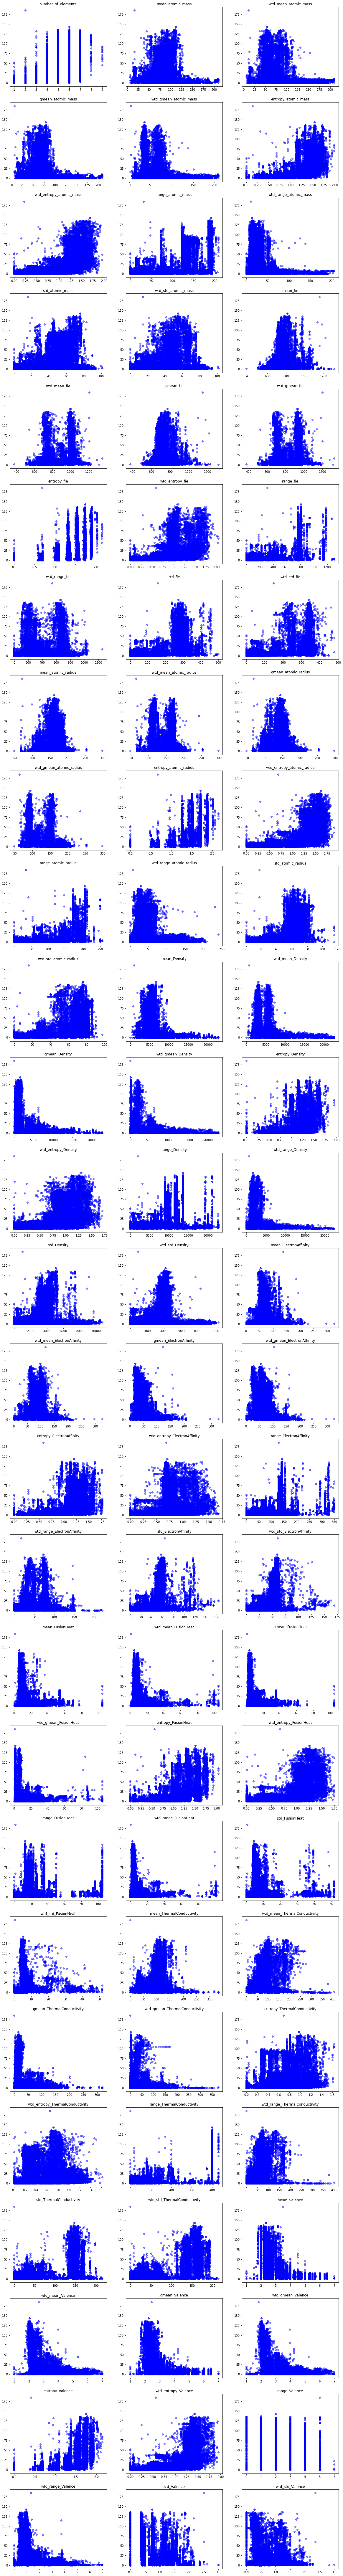

In [3]:
# list of all the predictor variables
predictors = ['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_ElectronAffinity', 'wtd_gmean_ElectronAffinity',
       'entropy_ElectronAffinity', 'wtd_entropy_ElectronAffinity',
       'range_ElectronAffinity', 'wtd_range_ElectronAffinity',
       'std_ElectronAffinity', 'wtd_std_ElectronAffinity', 'mean_FusionHeat',
       'wtd_mean_FusionHeat', 'gmean_FusionHeat', 'wtd_gmean_FusionHeat',
       'entropy_FusionHeat', 'wtd_entropy_FusionHeat', 'range_FusionHeat',
       'wtd_range_FusionHeat', 'std_FusionHeat', 'wtd_std_FusionHeat',
       'mean_ThermalConductivity', 'wtd_mean_ThermalConductivity',
       'gmean_ThermalConductivity', 'wtd_gmean_ThermalConductivity',
       'entropy_ThermalConductivity', 'wtd_entropy_ThermalConductivity',
       'range_ThermalConductivity', 'wtd_range_ThermalConductivity',
       'std_ThermalConductivity', 'wtd_std_ThermalConductivity',
       'mean_Valence', 'wtd_mean_Valence', 'gmean_Valence',
       'wtd_gmean_Valence', 'entropy_Valence', 'wtd_entropy_Valence',
       'range_Valence', 'wtd_range_Valence', 'std_Valence', 'wtd_std_Valence']


# making scatter plots for each predictor and the response 
plt.figure(figsize=(20,160))
for i,j in enumerate(predictors):
    plt.subplot(27,3,i+1)
    plt.scatter(train_data[j],train_data["critical_temp"], color = 'b', alpha = 0.5)
    plt.title(predictors[i])
plt.show()

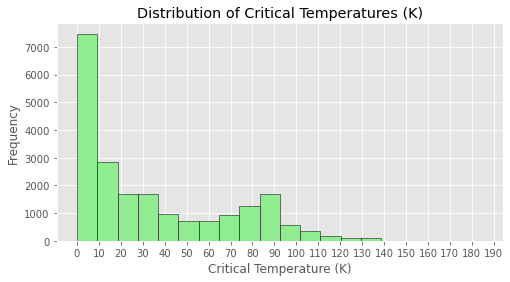

In [4]:
# looking at distribution of response variable

# setting plot style similar to R's ggplot
plt.style.use('ggplot')

# setting size of the plot
plt.figure(figsize = (8,4))

# plotting a histogram
plt.hist(train_data['critical_temp'].values, bins = 20,
        color = 'lightgreen',
        edgecolor = 'k')
plt.xlabel('Critical Temperature (K)')
plt.ylabel('Frequency')
plt.title('Distribution of Critical Temperatures (K)')
plt.xticks(np.arange(0, 200, step = 10));

In [5]:
# correlation matrix
corr_mat = train_data.corr()
corr_mat

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
number_of_elements,1.000000,-0.141923,-0.353064,-0.292969,-0.454525,0.939304,0.881845,0.682777,-0.320293,0.513998,...,-0.648551,-0.618512,-0.659268,0.967832,0.892559,0.231874,-0.447770,0.105365,0.035216,0.601069
mean_atomic_mass,-0.141923,1.000000,0.815977,0.940298,0.745841,-0.104000,-0.097609,0.125659,0.446225,0.196460,...,0.304683,0.392153,0.321399,-0.156786,-0.145610,-0.107450,0.168633,-0.080279,-0.081253,-0.113523
wtd_mean_atomic_mass,-0.353064,0.815977,1.000000,0.848242,0.964085,-0.308046,-0.412666,-0.144029,0.716623,-0.060739,...,0.545587,0.539780,0.548981,-0.375718,-0.331025,-0.039155,0.330904,-0.003681,0.077323,-0.312272
gmean_atomic_mass,-0.292969,0.940298,0.848242,1.000000,0.856975,-0.190214,-0.232183,-0.175861,0.458473,-0.121708,...,0.427961,0.511508,0.450357,-0.306246,-0.307662,-0.165010,0.272303,-0.124627,-0.117336,-0.230345
wtd_gmean_atomic_mass,-0.454525,0.745841,0.964085,0.856975,1.000000,-0.370561,-0.484664,-0.352093,0.673326,-0.274487,...,0.614100,0.608417,0.623261,-0.477785,-0.448072,-0.078641,0.409674,-0.033313,0.030361,-0.369858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
range_Valence,0.231874,-0.107450,-0.039155,-0.165010,-0.078641,0.203207,0.161350,0.208861,0.023251,0.192347,...,0.111249,-0.041651,0.033007,0.155410,0.204411,1.000000,0.114000,0.973788,0.867393,-0.143546
wtd_range_Valence,-0.447770,0.168633,0.330904,0.272303,0.409674,-0.350047,-0.546910,-0.365395,0.594214,-0.273598,...,0.683700,0.532805,0.681415,-0.417283,-0.639818,0.114000,1.000000,0.184380,0.132162,-0.439901
std_Valence,0.105365,-0.080279,-0.003681,-0.124627,-0.033313,0.087838,0.056309,0.134676,0.066739,0.144106,...,0.186270,0.034589,0.108469,0.034580,0.089774,0.973788,0.184380,1.000000,0.885856,-0.208072
wtd_std_Valence,0.035216,-0.081253,0.077323,-0.117336,0.030361,0.018758,-0.006937,0.102634,0.092819,0.122547,...,0.258593,0.088388,0.168962,-0.017031,0.081284,0.867393,0.132162,0.885856,1.000000,-0.300028


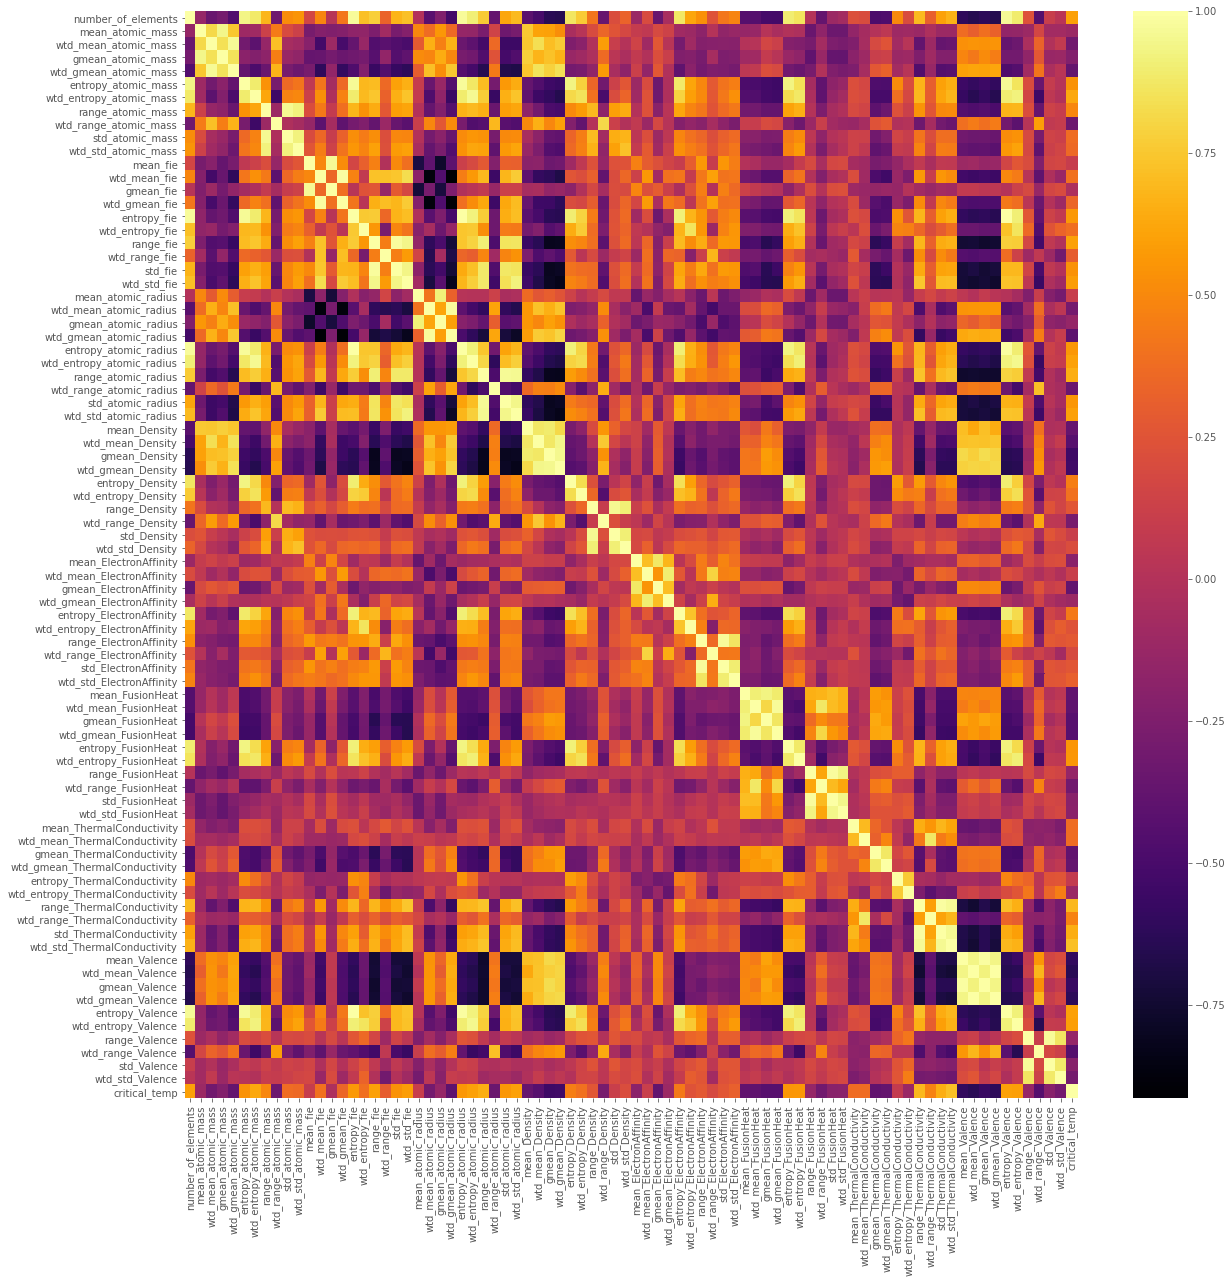

In [6]:
# correlation matrix heatmap
plt.figure(figsize=(20,20))
sns.heatmap(corr_mat, cmap = 'inferno');

In [7]:
# design matrix
X = train_data[predictors].values

# response vector
y = train_data['critical_temp'].values

label = train_data['critical_temp']

In [8]:
# design matrix
X = train_data[predictors].values

# standardizing design matrix
X_std = StandardScaler().fit_transform(X)

# creating PCA object
pca = PCA()

# doing PCA to find principal components
Z = pca.fit_transform(X_std)

# creating principal components dataframe to look at
Z_df = pd.DataFrame(data = Z, columns = list(range(1,82)))
Z_df

,1,2,3,4,5,6,7,8,9,10,...,72,73,74,75,76,77,78,79,80,81
0,-3.664487,0.991643,3.045260,1.713725,0.246057,-0.203213,0.450996,-0.220078,-0.384088,0.220391,...,-0.023332,0.008540,-0.009915,0.002499,0.000673,0.003487,0.005124,-0.003568,0.005670,-0.004764
1,-4.555468,-0.214585,1.722873,1.111493,0.981005,-1.011501,-0.245300,0.214118,0.408239,-1.139334,...,0.036476,0.095869,-0.020918,-0.030095,0.000062,0.021723,0.011310,-0.006537,0.001735,-0.004198
2,-3.488176,1.055167,3.130821,1.811590,0.296335,-0.211822,0.485278,0.010470,-0.496751,0.180617,...,-0.028371,-0.000143,-0.004124,0.001734,-0.000528,0.002263,0.003339,-0.006189,0.004832,-0.005472
3,-3.581284,1.020144,3.084663,1.760859,0.270516,-0.208458,0.466648,-0.108675,-0.439150,0.199967,...,-0.025976,0.004900,-0.007335,0.002157,0.000299,0.002886,0.004308,-0.004775,0.005329,-0.005093
4,-3.809671,0.948297,2.981358,1.627398,0.199680,-0.188464,0.426050,-0.426505,-0.279207,0.263086,...,-0.017537,0.012940,-0.013610,0.002931,0.000440,0.004618,0.006400,-0.001557,0.006026,-0.004206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,2.350607,-0.387111,-1.449530,-2.426772,2.911041,-1.754652,0.114288,-1.041992,-0.186578,1.235675,...,-0.004106,-0.060863,-0.052370,0.018123,0.026375,0.024733,-0.016884,0.036880,0.000407,-0.012243
21259,-5.446209,-0.780202,1.336464,-0.290010,1.142610,0.236224,0.988120,-0.775729,0.324684,-0.793209,...,-0.013417,-0.003340,0.009971,0.017504,0.005504,-0.013596,-0.001798,0.006237,-0.000998,-0.001181
21260,10.477462,-0.931943,1.572640,-0.372598,-0.214181,-1.304829,-0.814939,0.052747,-0.720376,-0.347597,...,-0.066098,0.002647,0.008463,-0.018508,-0.001726,0.009524,0.013146,0.003719,0.007787,0.001225
21261,9.771885,-1.001345,1.215602,-0.872021,-0.954733,-0.674221,-0.754652,-1.624888,0.146395,-0.065916,...,-0.052065,0.003559,0.004636,-0.009418,-0.002175,0.009862,0.009411,-0.005655,0.008243,0.002287


In [9]:
## calculating cumulative explained variance ##

# getting eigenvalues and eigenvectors of the correlation matrix of the standardized design matrix
E, V = eig(X_std.T @ X_std)
print(E[0]/np.sum(E)) # explained variance for first principal component
cumvar = np.cumsum(pca.explained_variance_ratio_) # cumulative explained variance for all principal components
cumvar

0.38931798245375404


array([0.38931798, 0.49414007, 0.58935207, 0.66842937, 0.7272512 ,
       0.76513489, 0.8013574 , 0.83242847, 0.8560396 , 0.87581839,
       0.89410206, 0.90868803, 0.9204725 , 0.93045804, 0.9402828 ,
       0.94809799, 0.95528592, 0.96072059, 0.96555386, 0.96937062,
       0.97239336, 0.97525888, 0.97782371, 0.97989482, 0.981867  ,
       0.98372988, 0.98543026, 0.98685619, 0.98811913, 0.98927039,
       0.99029449, 0.99125491, 0.99217417, 0.99289294, 0.99357786,
       0.99419877, 0.99476954, 0.99526251, 0.99569935, 0.99612203,
       0.99644816, 0.99675418, 0.99701116, 0.99724859, 0.99747212,
       0.99768749, 0.997884  , 0.99807157, 0.99825233, 0.99842756,
       0.99858394, 0.99873775, 0.99886446, 0.99898456, 0.99910242,
       0.99920788, 0.99929714, 0.99937851, 0.99945842, 0.99953023,
       0.999595  , 0.9996519 , 0.99969627, 0.99974023, 0.99977965,
       0.99981497, 0.99984716, 0.99987529, 0.9998981 , 0.99991868,
       0.99993681, 0.99995349, 0.99996825, 0.99997748, 0.99998

0.9892703933612071


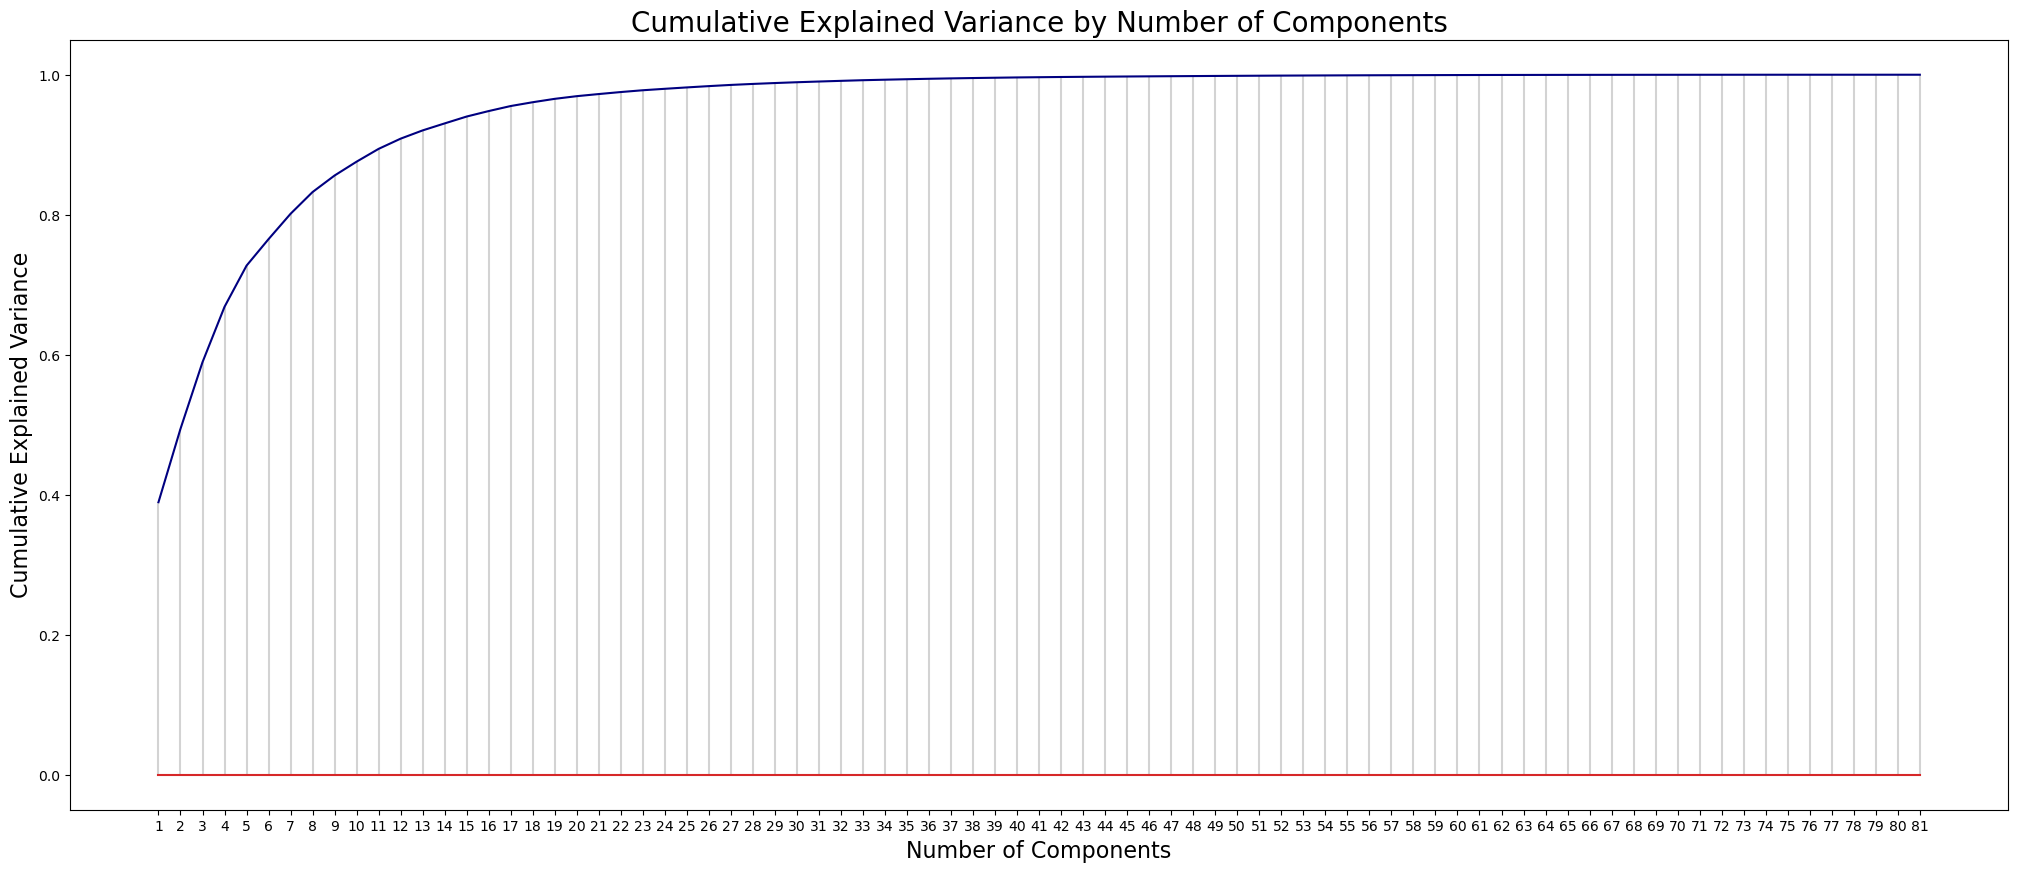

In [10]:
# making a plot for cumulative explained variance by the number of principal components
print(cumvar[29]) # looking at cumulative explained variance for first 30 principal components
plt.style.use('default') 
plt.figure(figsize = (25,10))
plt.stem(cumvar, linefmt = 'lightgrey', markerfmt = 'navy', use_line_collection = True)
plt.xticks(range(0,81), labels = list(range(1,82)))
plt.xlabel('Number of Components', fontsize = 16)
plt.ylabel('Cumulative Explained Variance', fontsize = 16);
plt.title('Cumulative Explained Variance by Number of Components', fontsize = 20);

In [11]:
# a function to easily do PCR - source of code found in references section of paper

def pcr(predictors, response, pc):
    
    ''' Step 1: PCA on input data'''
    # Define the PCA object
    pca = PCA()
    
    # Preprocess (2) Standardize features by removing the mean and scaling to unit variance
    Xstd = StandardScaler().fit_transform(predictors)
    # Run PCA producing the reduced variable Xred and select the first pc components
    Z = pca.fit_transform(Xstd)[:,:pc]
    ''' Step 2: regression on selected principal components'''
    # Create linear regression object
    regr = LinearRegression()
    # Fit
    Z_reg = regr.fit(Z, response)
    # predicted values
    y_hat = regr.predict(Z)
    # Cross-validation
    y_cv = cross_val_predict(Z_reg, Z, response, cv=10)
    # Calculate scores for OG model and cross-validation models
    R2 = r2_score(response, y_hat)
    R2_cv = r2_score(response, y_cv)
    # Calculate mean square error for OG model and cross validation models
    mse = mean_squared_error(response, y_hat)
    mse_cv = mean_squared_error(response, y_cv)
    
    ''' Step 3: Defining coefficients of Models'''
    # coefficients of regressors for principal components regression
    E, V = eig(Xstd.T @ Xstd)
    Beta_Z = Z_reg.coef_
    Beta_X = V[:,:pc] @ Beta_Z
    
    print('R2: %5.3f'  % R2)
    print('R2 CV: %5.3f'  % R2_cv)
    print('MSE: %5.3f' % mse)
    print('MSE CV: %5.3f' % mse_cv)
    print('Intercept:', Z_reg.intercept_)
    print('Coefficients:', Z_reg.coef_)
    return(Z_reg, Beta_X, y_hat, y_cv, R2, R2_cv, mse, mse_cv)

In [12]:
# the following several lines of code show PCR results for different subsets of principal components

Z_model, beta_X, predicted, predicted_cv, r2, r2_cv, mse, mse_cv = pcr(X, y, pc = 20)

R2: 0.628
R2 CV: 0.613
MSE: 436.462
MSE CV: 454.233
Intercept: 34.42121913535249
Coefficients: [-4.0043751  -1.98810954  2.40200866 -1.25055204  2.56626636  3.42724176
 -0.76400443 -0.57528784 -1.9102399   0.09084165 -3.07758419 -1.93249279
  1.08631023  0.57218435  4.00960152 -0.30450643 -0.22193757 -4.80502217
  2.75139291  8.10565135]


In [13]:
# the following several lines of code show PCR results for different subsets of principal components

Z_model, beta_X, predicted, predicted_cv, r2, r2_cv, mse, mse_cv = pcr(X, y, pc = 22)

R2: 0.631
R2 CV: 0.611
MSE: 432.988
MSE CV: 456.146
Intercept: 34.42121913535249
Coefficients: [-4.0043751  -1.98810954  2.40200866 -1.25055204  2.56626636  3.42724176
 -0.76400443 -0.57528784 -1.9102399   0.09084165 -3.07758419 -1.93249279
  1.08631023  0.57218435  4.00960152 -0.30450643 -0.22193757 -4.80502217
  2.75139291  8.10565135  2.9911842   2.35121154]


In [14]:
# the following several lines of code show PCR results for different subsets of principal components

Z_model, beta_X, predicted, predicted_cv, r2, r2_cv, mse, mse_cv = pcr(X, y, pc = 33)

R2: 0.690
R2 CV: 0.672
MSE: 363.729
MSE CV: 384.912
Intercept: 34.42121913535249
Coefficients: [-4.0043751  -1.98810954  2.40200866 -1.25055204  2.56626636  3.42724176
 -0.76400443 -0.57528784 -1.9102399   0.09084165 -3.07758419 -1.93249279
  1.08631023  0.57218435  4.00960152 -0.30450643 -0.22193757 -4.80502217
  2.75139291  8.10565135  2.9911842   2.35121154 13.20875786 -1.22877303
 11.53167589  4.61912283 -0.10150983  1.47960276 -0.32030094 -3.50477045
 -8.56518519 -0.55818074 -3.23049723]


In [15]:
# the following several lines of code show PCR results for different subsets of principal components

Z_model, beta_X, predicted, predicted_cv, r2, r2_cv, mse, mse_cv = pcr(X, y, pc = 40)

R2: 0.696
R2 CV: 0.674
MSE: 357.226
MSE CV: 382.493
Intercept: 34.42121913535249
Coefficients: [ -4.0043751   -1.98810954   2.40200866  -1.25055204   2.56626636
   3.42724176  -0.76400443  -0.57528784  -1.9102399    0.09084165
  -3.07758419  -1.93249279   1.08631023   0.57218435   4.00960152
  -0.30450643  -0.22193757  -4.80502217   2.75139291   8.10565135
   2.9911842    2.35121154  13.20875786  -1.22877303  11.53167589
   4.61912283  -0.10150983   1.47960276  -0.32030094  -3.50477045
  -8.56518519  -0.55818074  -3.23049723  -2.69137523   2.71461215
 -10.27218277  -1.86433117   2.073612     0.23920907   0.94830393]


In [16]:
# the following several lines of code show PCR results for different subsets of principal components

Z_model, beta_X, predicted, predicted_cv, r2, r2_cv, mse, mse_cv = pcr(X, y, pc = 80)

R2: 0.737
R2 CV: 0.711
MSE: 308.877
MSE CV: 339.242
Intercept: 34.42121913535249
Coefficients: [-4.00437510e+00 -1.98810954e+00  2.40200866e+00 -1.25055204e+00
  2.56626636e+00  3.42724176e+00 -7.64004429e-01 -5.75287843e-01
 -1.91023990e+00  9.08416531e-02 -3.07758419e+00 -1.93249279e+00
  1.08631023e+00  5.72184352e-01  4.00960152e+00 -3.04506434e-01
 -2.21937568e-01 -4.80502217e+00  2.75139291e+00  8.10565135e+00
  2.99118420e+00  2.35121154e+00  1.32087579e+01 -1.22877303e+00
  1.15316759e+01  4.61912283e+00 -1.01509827e-01  1.47960276e+00
 -3.20300936e-01 -3.50477045e+00 -8.56518519e+00 -5.58180741e-01
 -3.23049723e+00 -2.69137523e+00  2.71461215e+00 -1.02721828e+01
 -1.86433117e+00  2.07361200e+00  2.39209066e-01  9.48303927e-01
 -1.31338703e+01  3.32151648e+00 -1.35009673e+01 -5.72304233e+00
 -1.85199975e+00  6.82479688e+00  1.09675754e+00 -6.24468105e+00
  2.94482291e+00  2.53821684e+00  2.36204506e+00  2.09702075e+00
  3.00814465e+00  2.64269466e+01 -1.08121382e+00 -7.29772238

In [17]:
corr = pd.DataFrame(train_data.corr()['critical_temp'])
corr['abs'] = np.abs(corr['critical_temp'])
corr = corr.sort_values(by='abs',ascending=False).drop('abs',axis=1).dropna().reset_index()
corr = corr.rename(columns={'index':'feature'}).loc[1:]

In [18]:
import time
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import Lasso,Ridge,ElasticNet, BayesianRidge, LinearRegression
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

models = {'OLS':LinearRegression(),'ElasticNet':ElasticNet(),
          'BayesianRidge':BayesianRidge(),'Lasso':Lasso(),
         'Ridge':Ridge(),'KNN':neighbors.KNeighborsRegressor(),
         'rff':RandomForestRegressor()}

#e=0.1515151515151516
#intercept = 1.5542


def model_performance(X,y):
    times =[]
    keys = []
    mean_squared_errors = []
    R2_scores = []
    features = X.columns
    y_t = y #(lambda x: (x**e)-intercept)
    X_train, X_test, y_train, y_test = train_test_split(X, y_t, test_size=0.3, random_state=i)
    y_test0 = y_test  #(lambda x: (x+intercept)**(1/e))
    for k,v in models.items():
        model = v
        t0=time.time()
        model.fit(X_train, y_train)
        train_time = time.time()-t0
        t1 = time.time()
        pred = model.predict(X_test)
        predict_time = time.time()-t1
        pred =  pred #pd.Series(pred).apply(lambda x: (x+intercept)**(1/e))
        Time_total = train_time+predict_time
        times.append(Time_total)
        R2_scores.append(r2_score(y_test0,pred))
        mean_squared_errors.append(mean_squared_error(y_test0,pred))
        keys.append(k)
    table = pd.DataFrame({'model':keys, 'RMSE':mean_squared_errors,'R2 score':R2_scores,'time':times})
    table['features'] = pd.Series([len(features) for i in range(len(R2_scores))])
    table['RMSE'] = table['RMSE'].to_frame().apply(lambda x: np.sqrt(x))
    return table

In [19]:
tables = pd.DataFrame()
#for index in corr.index:
#features = list(corr['feature'].loc[:index])
_ = train_data
tables = pd.concat([tables,model_performance(_,label)],axis=0)
#tables.to_csv('seven_regressor_results_fitted.csv')
tables.sort_values(by='RMSE',ascending=True)

,model,RMSE,R2 score,time,features
0,OLS,1.904261e-12,1.000000,0.033324,82
2,BayesianRidge,1.256771e-09,1.000000,0.068143,82
4,Ridge,3.908895e-06,1.000000,0.030746,82
3,Lasso,3.874901e-02,0.999999,0.150652,82
1,ElasticNet,4.016178e-02,0.999999,0.228548,82
6,rff,5.583259e-01,0.999735,45.860769,82
5,KNN,1.088625e+01,0.899123,0.700179,82


In [20]:
# tables = pd.DataFrame()
# for index in corr.index:
#     features = list(corr['feature'].loc[:index])
#     _ = train_data[features]
#     tables = pd.concat([tables,model_performance(_,label,i=index)],axis=0)
#     print("successful")
# tables.to_csv('seven_regressor_results_fitted.csv')
# tables.sort_values(by='RMSE',ascending=True)

In [21]:
#model_performance(X,y,i)

In [22]:
import pandas as pd
results = pd.read_csv('seven_regressor_results_fitted.csv').drop('Unnamed: 0',axis=1)
results['model'] = results['model'].apply(lambda x: 'RandomForestRegressor' if x=='rff' else x)

In [23]:
best_results = pd.DataFrame()
for model in results['model'].unique():
    _  = results[(results['model']==model)].sort_values(by='RMSE',ascending=True).reset_index().loc[0]
    best_results = pd.concat([best_results,_],axis=1)
best_results = best_results.transpose().drop('index',axis=1)
best_results = best_results.sort_values(by='RMSE',ascending=True).reset_index().drop('index',axis=1)
best_results = best_results[['model','RMSE','R2 score', 'features','time']]
best_results = best_results.rename(columns={'features':'# of features used'})
for feature in ['RMSE','R2 score','time']:
    best_results[feature] = best_results[feature].apply(lambda x: round(x,4))
best_results

,model,RMSE,R2 score,# of features used,time
0,OLS,0.0000,1.0000,82,0.0435
1,BayesianRidge,0.0000,1.0000,82,0.0630
2,Ridge,0.0000,1.0000,82,0.0287
3,Lasso,0.0367,1.0000,82,0.1624
4,ElasticNet,0.0382,1.0000,82,0.2535
5,RandomForestRegressor,0.0465,1.0000,82,47.0260
6,KNN,10.9466,0.8937,82,0.7680


In [24]:
import time
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import Lasso,Ridge,ElasticNet, BayesianRidge, LinearRegression
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

times =[]
keys = []
mean_squared_errors = []
R2_scores = []
features = train_data.columns
y_t = y #(lambda x: (x**e)-intercept)
X_train, X_test, y_train, y_test = train_test_split(X, y_t, test_size=0.3, random_state=i)
y_test0 = y_test  #(lambda x: (x+intercept)**(1/e))

model = RandomForestRegressor()
t0=time.time()
results = model.fit(X_train, y_train)
train_time = time.time()-t0
t1 = time.time()
pred = model.predict(X_test)
predict_time = time.time()-t1
pred =  pred #pd.Series(pred).apply(lambda x: (x+intercept)**(1/e))
Time_total = train_time+predict_time
times.append(Time_total)
R2_scores.append(r2_score(y_test0,pred))
mean_squared_errors.append(mean_squared_error(y_test0,pred))
#keys.append(k)
importances = model.feature_importances_

<AxesSubplot:>

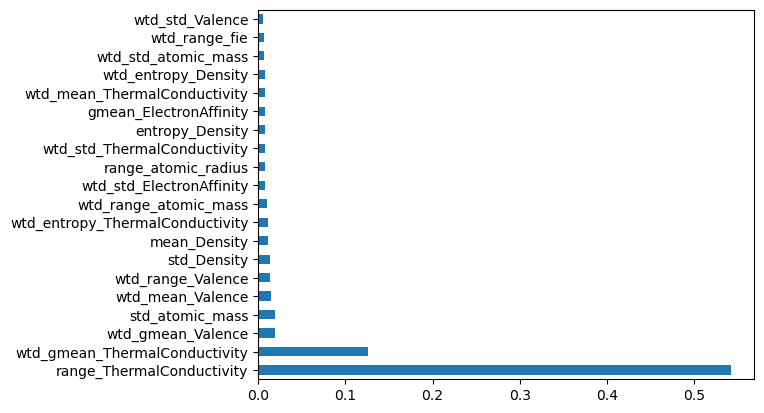

In [25]:
(pd.Series(model.feature_importances_,index=train_data.columns[:81])
   .nlargest(20)
   .plot(kind='barh'))